<a href="https://colab.research.google.com/github/KunalSingh-Physics/CNN_cats_and_dogs/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/machine_learning_projects/data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [ ]:
len(os.listdir(os.path.join(data_dir)))


2

In [ ]:
#to remove problematic files
for img_fold in os.listdir(data_dir):
    for imgs in os.listdir(os.path.join(data_dir,img_fold)):
        img_path=os.path.join(data_dir,img_fold,imgs)
        try:
            im=cv2.imread(img_path)
            tip=imghdr.what(img_path)
            if tip not in image_exts: 
                os.remove(img_path)
                print(f'image {img_path} not in image_exts')
        except:
            print(f'issue in reading {img_path}')
            os.remove(img_path)

        


In [ ]:
# im=cv2.imread('data/cats/07CAT-STRIPES-mediumSquareAt3X-v2.jpg')
# plt.show()

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 610 files belonging to 2 classes.


In [ ]:
# tf.keras.utils.image_dataset_from_directory??


In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()


In [ ]:
#class1=dogs
#class2=cats
batch[1]

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

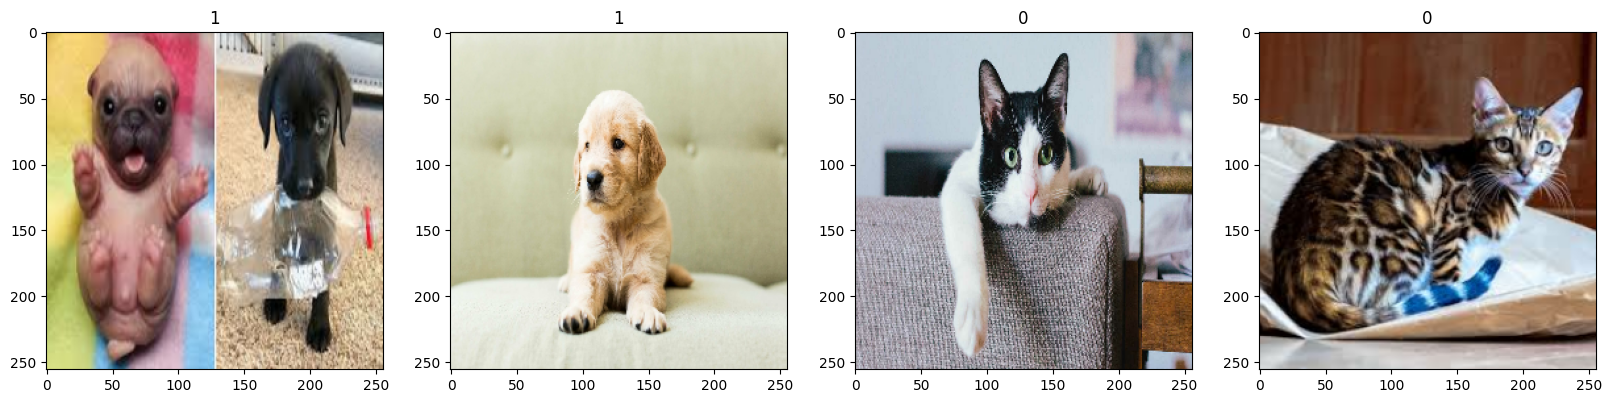

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


Scaling

In [ ]:
scaled=data.map(lambda x,y: (x/255, y))

In [ ]:
batch=scaled.as_numpy_iterator().next()

In [ ]:
batch[0].max()

1.0

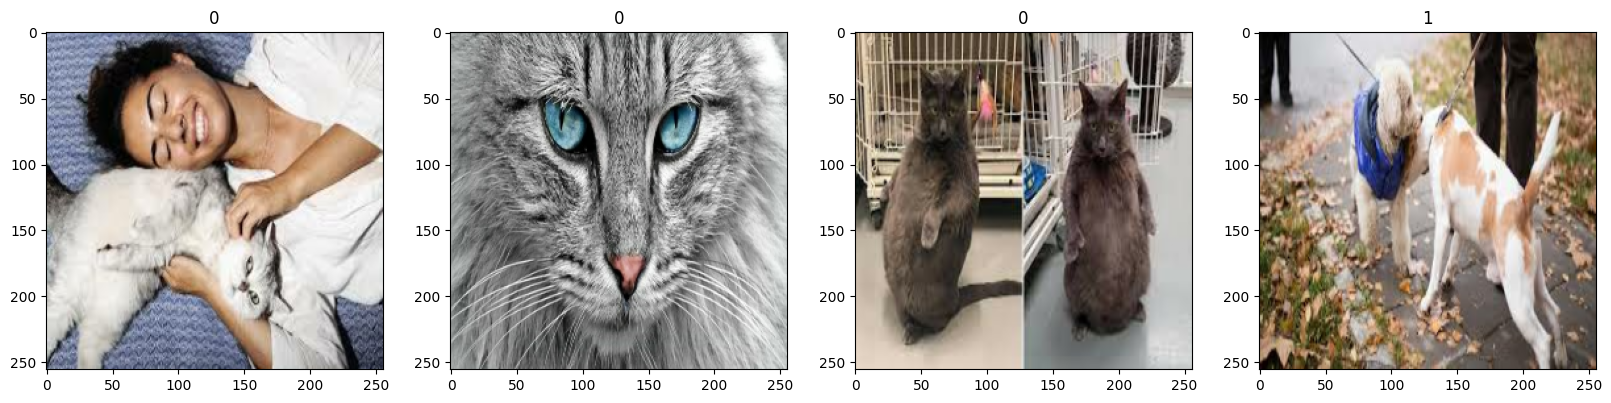

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
len(scaled)

20

In [ ]:
train_size = int(len(scaled)*.7)
val_size = int(len(scaled)*.2)
test_size = int(len(scaled)*.1)

In [ ]:
train_size+val_size+test_size

20

In [ ]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization,ConvLSTM2D,TimeDistributed

In [ ]:
# # create CNN model
#from another example doesn't work that good

# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
model = Sequential()


In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='/content/drive/MyDrive/machine_learning_projects/logs'

# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=logdir,
                                                 monitor='val_loss',
                                                 mode='min',
                                                 save_best_only=True,
                                                 save_weights_only=True, 
                                                 verbose=0,
                                                  )

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[model_checkpoint_callback])


Epoch 1/20
14/14 [==============================] - 77s 5s/step - loss: 0.9781 - accuracy: 0.5089 - val_loss: 0.6778 - val_accuracy: 0.5469
Epoch 2/20
14/14 [==============================] - 32s 2s/step - loss: 0.6796 - accuracy: 0.5513 - val_loss: 0.6616 - val_accuracy: 0.6328
Epoch 3/20
14/14 [==============================] - 21s 1s/step - loss: 0.6553 - accuracy: 0.6161 - val_loss: 0.6404 - val_accuracy: 0.6016
Epoch 4/20
14/14 [==============================] - 31s 2s/step - loss: 0.6437 - accuracy: 0.6161 - val_loss: 0.6145 - val_accuracy: 0.6953
Epoch 5/20
14/14 [==============================] - 32s 2s/step - loss: 0.5919 - accuracy: 0.7411 - val_loss: 0.5549 - val_accuracy: 0.7344
Epoch 6/20
14/14 [==============================] - 21s 1s/step - loss: 0.4979 - accuracy: 0.7812 - val_loss: 0.4735 - val_accuracy: 0.7578
Epoch 7/20
14/14 [==============================] - 21s 1s/step - loss: 0.4527 - accuracy: 0.8058 - val_loss: 0.5237 - val_accuracy: 0.6797
Epoch 8/20
14/14 [==

In [ ]:
model.save('/content/drive/MyDrive/machine_learning_projects/cat_dog_model')


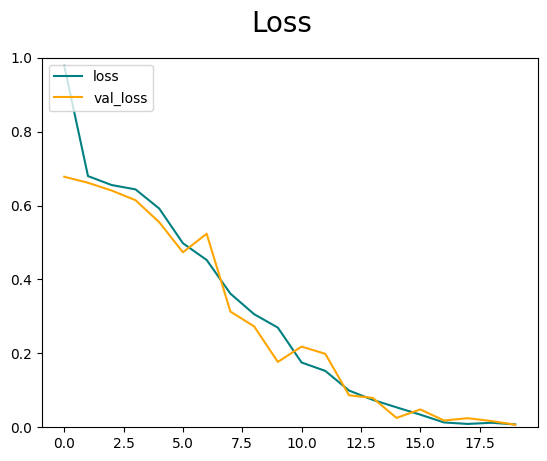

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.show()

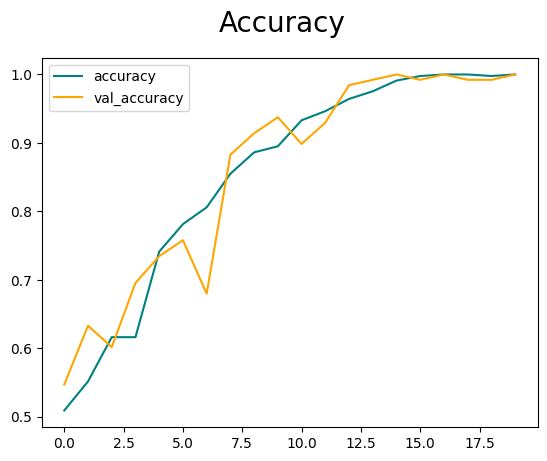

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 185ms/step


In [ ]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())


0.9444444 0.9444444 0.9411765


**Example  1**

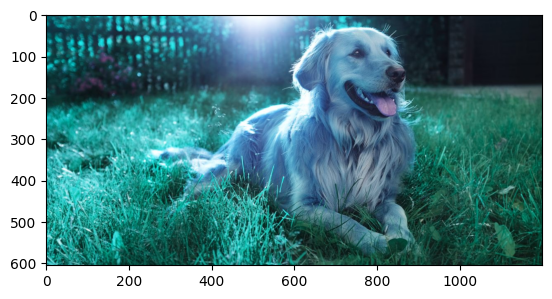

In [ ]:
img = cv2.imread('dog_test.jpg')
plt.imshow(img)
plt.show()


In [ ]:
resize = tf.image.resize(img, (256,256))


In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/machine_learning_projects/cat_dog_model')


In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 20ms/step


In [ ]:
if yhat > 0.5: 
    print(f'It is a dog{yhat}')
else:
    print(f'It is a cat {yhat}')

It is a dog[[0.99550325]]


**Example 2**

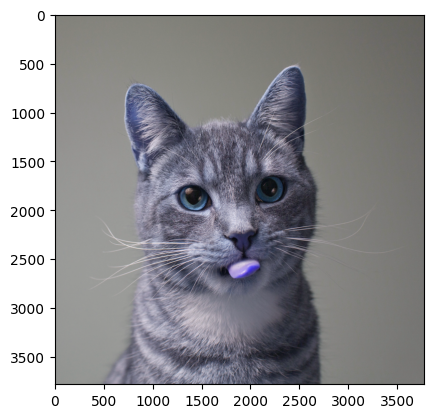

In [ ]:
img2 = cv2.imread('cat_tongue.webp')
plt.imshow(img2)
plt.show()
resize2 = tf.image.resize(img2, (256,256))


In [ ]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))
if yhat2 > 0.5: 
    print(f'It is a dog{yhat2}')
else:
    print(f'It is a cat {yhat2}')

1/1 [==============================] - 9s 9s/step
It is a cat [[0.00399022]]
